In [1]:
#Import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score


In [2]:
#Import dataset
data_relevant = pd.read_csv('data_relevant.csv')
data_relevant

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,21,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,25,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,26,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,34,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,39,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,30119,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006
2733,30128,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378
2734,30138,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753
2735,30142,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531


In [3]:
data_relevant = data_relevant.drop(columns=['Unnamed: 0'])

data_relevant.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923


In [4]:
data_relevant.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
count,2.737000e+03,2737.000000,2737.000000,2737.000000,2737.000000,2737.0,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.00000,2737.000000
mean,8.422258e+05,3.308732,2.350566,1916.839971,22781.881257,1.0,467.278772,243.430764,1987.678115,98054.739130,7.495798,3.54768,450.250338
std,3.868158e+05,0.775191,0.590768,637.386373,51908.754826,0.0,207.783510,245.708990,9.910997,48.849616,0.783651,0.67159,168.203530
min,4.118100e+04,2.000000,1.000000,770.000000,1078.000000,1.0,0.000000,0.000000,1978.000000,98001.000000,6.000000,2.00000,22.943038
25%,5.700000e+05,3.000000,2.000000,1460.000000,7280.000000,1.0,420.000000,70.000000,1980.000000,98023.000000,7.000000,3.00000,335.714286
50%,7.300000e+05,3.000000,2.500000,1810.000000,9014.000000,1.0,480.000000,180.000000,1985.000000,98042.000000,7.000000,3.00000,418.139535
75%,1.010100e+06,4.000000,3.000000,2240.000000,13479.000000,1.0,550.000000,350.000000,1992.000000,98072.000000,8.000000,4.00000,542.168675
max,2.301000e+06,8.000000,7.000000,5490.000000,765753.000000,1.0,2210.000000,2200.000000,2022.000000,98354.000000,12.000000,5.00000,1707.317073


In [5]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

data_relevant['in_Seattle'] = np.where(data_relevant['postal_code'].isin(Seattle_postalcodes),1,0)

In [6]:
data_relevant['in_Seattle'].value_counts()

0    2520
1     217
Name: in_Seattle, dtype: int64

In [7]:
Seattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 1]
Seattle_Homes['price'].describe()

count    2.170000e+02
mean     8.945603e+05
std      3.139701e+05
min      1.220500e+05
25%      7.000000e+05
50%      8.380000e+05
75%      1.010000e+06
max      2.020000e+06
Name: price, dtype: float64

In [8]:
NotSeattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 0]
NotSeattle_Homes['price'].describe()

count    2.520000e+03
mean     8.377193e+05
std      3.921823e+05
min      4.118100e+04
25%      5.600000e+05
50%      7.150000e+05
75%      1.010325e+06
max      2.301000e+06
Name: price, dtype: float64

In [9]:
data_relevant

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft,in_Seattle
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113,0
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713,0
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741,0
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481,1
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006,0
2733,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378,0
2734,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753,0
2735,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531,1


In [10]:
data_relevant = data_relevant[data_relevant['condition_code'] >= 3]

In [11]:
data_relevant['price'].min()

41181.0

In [12]:
data_relevant['price'].max()

2301000.0

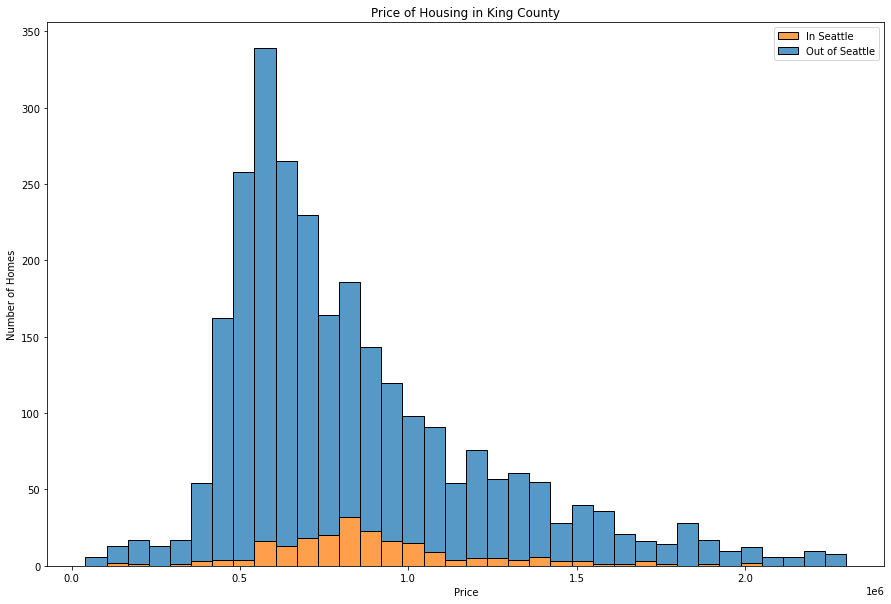

In [13]:
fig, ax = plt.subplots(figsize = (15 , 10))

X = data_relevant['price']
sns.histplot(data_relevant, x=X, hue="in_Seattle", multiple="stack")
plt.legend(loc='upper right', labels=['In Seattle', 'Out of Seattle'])
ax.set_xlabel('Price')
ax.set_ylabel('Number of Homes')
ax.set_title('Price of Housing in King County')
plt.ticklabel_format(style='plain', axis='y');

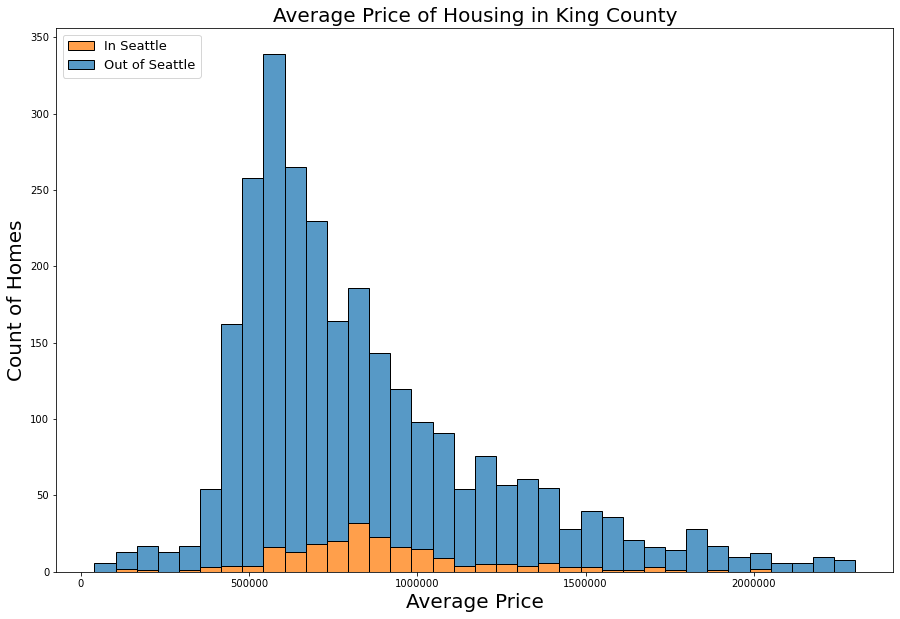

In [14]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker

sns.histplot(data_relevant, x="price", hue="in_Seattle", multiple="stack")
plt.legend(loc='upper left', labels=['In Seattle', 'Out of Seattle'], fontsize = 13)
ax.set_xlabel('Average Price', fontsize = 20)
ax.set_ylabel('Count of Homes', fontsize = 20)
ax.set_title('Average Price of Housing in King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='x');

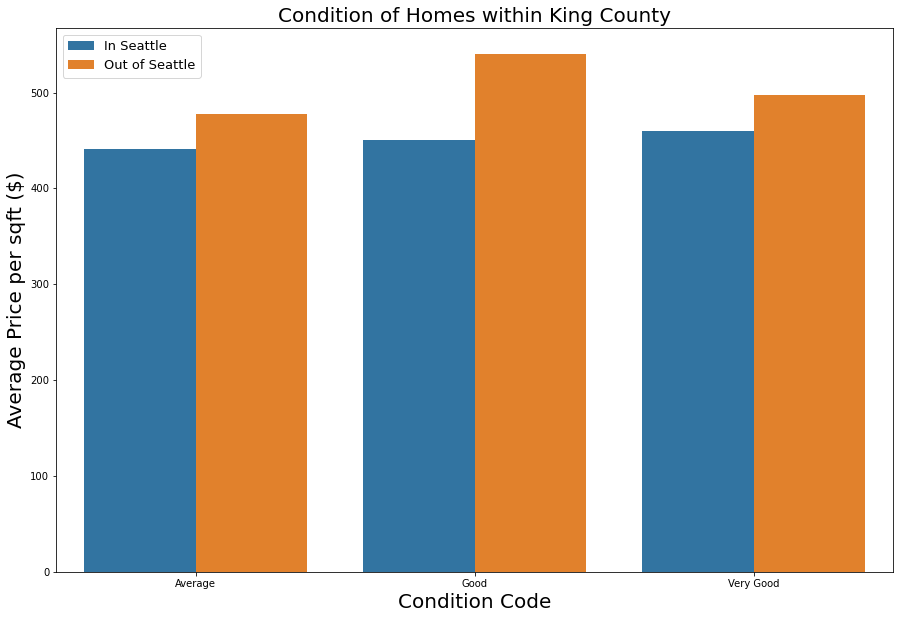

In [15]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=data_relevant["condition_code"], y=data_relevant['price_sqft'], hue=data_relevant["in_Seattle"], ci = None)
ax.legend(loc='upper left', labels=['In Seattle', 'Out of Seattle'], fontsize = 13)
ax.set_xlabel('Condition Code', fontsize = 20)
ax.set_ylabel('Average Price per sqft ($)', fontsize = 20)
ax.set_title('Condition of Homes within King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
ax.set_xticklabels(['Average','Good', 'Very Good']);

In [16]:
data_relevant.condition_code.describe()

count    2731.000000
mean        3.551080
std         0.668393
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: condition_code, dtype: float64

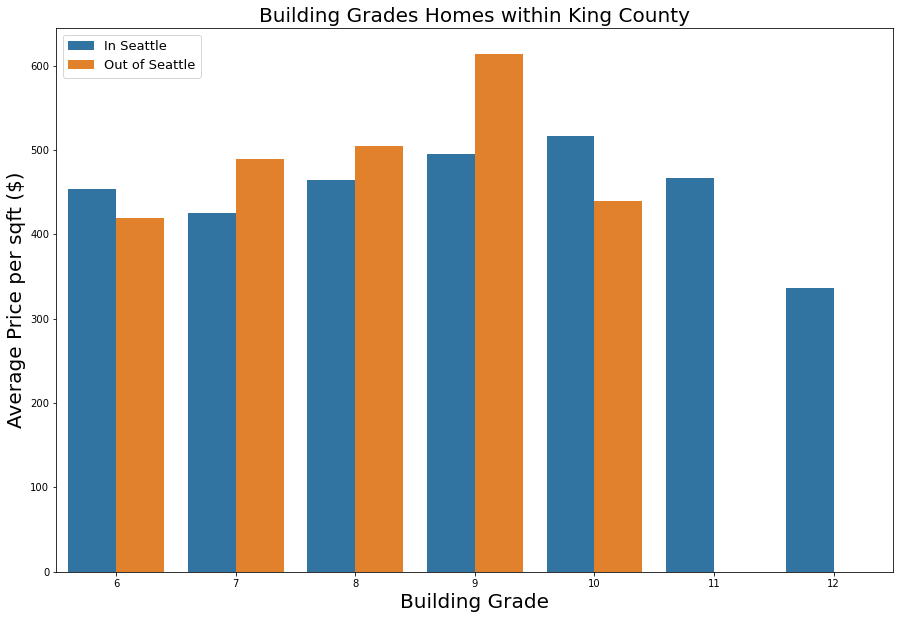

In [17]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=data_relevant["grade_code"], y=data_relevant['price_sqft'], hue=data_relevant["in_Seattle"], ci = None)
ax.legend(loc='upper left', labels=['In Seattle', 'Out of Seattle'], fontsize = 13)
ax.set_xlabel('Building Grade', fontsize = 20)
ax.set_ylabel('Average Price per sqft ($)', fontsize = 20)
ax.set_title('Building Grades Homes within King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y');

## Creating a Map of the Dataset

### New Datasets with the In Seattle vs Out of Seattle Breakdown

In [18]:
data = pd.read_csv('data_cleaned.csv')
data

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code
0,21,2310000170,750000.0,3,2.0,1590,7754,1.0,440,0,1990,47.357065,-122.040670,98038,471.698113,7,4
1,25,2095600170,580000.0,3,3.0,2020,4482,1.0,600,120,1992,47.399470,-122.204130,98031,287.128713,7,3
2,26,8682282030,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,47.708760,-122.020730,98053,740.740741,9,3
3,34,5727500011,785000.0,3,2.0,1350,7354,1.0,460,120,1985,47.751020,-122.334470,98133,581.481481,7,5
4,39,1421059003,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,47.310595,-122.129380,98092,323.076923,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,30119,3821400080,500000.0,3,2.5,1610,7250,1.0,490,270,1978,47.479820,-122.325620,98168,310.559006,7,3
2614,30128,1761100480,560000.0,3,2.0,1480,8770,1.0,540,180,1985,47.287330,-122.362055,98023,378.378378,7,4
2615,30138,2408100010,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,47.645550,-122.108060,98052,692.465753,8,3
2616,30142,2539500005,880000.0,4,2.5,2260,5661,1.0,460,230,2000,47.568800,-122.295505,98108,389.380531,8,3


In [19]:
mapdata = data.copy()

In [20]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

mapdata['in_Seattle'] = np.where(mapdata['postal_code'].isin(Seattle_postalcodes),1,0)
mapdata

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code,in_Seattle
0,21,2310000170,750000.0,3,2.0,1590,7754,1.0,440,0,1990,47.357065,-122.040670,98038,471.698113,7,4,0
1,25,2095600170,580000.0,3,3.0,2020,4482,1.0,600,120,1992,47.399470,-122.204130,98031,287.128713,7,3,0
2,26,8682282030,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,47.708760,-122.020730,98053,740.740741,9,3,0
3,34,5727500011,785000.0,3,2.0,1350,7354,1.0,460,120,1985,47.751020,-122.334470,98133,581.481481,7,5,1
4,39,1421059003,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,47.310595,-122.129380,98092,323.076923,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,30119,3821400080,500000.0,3,2.5,1610,7250,1.0,490,270,1978,47.479820,-122.325620,98168,310.559006,7,3,0
2614,30128,1761100480,560000.0,3,2.0,1480,8770,1.0,540,180,1985,47.287330,-122.362055,98023,378.378378,7,4,0
2615,30138,2408100010,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,47.645550,-122.108060,98052,692.465753,8,3,0
2616,30142,2539500005,880000.0,4,2.5,2260,5661,1.0,460,230,2000,47.568800,-122.295505,98108,389.380531,8,3,1


In [21]:
df_seattle = mapdata.copy()

In [22]:
df_notseattle = mapdata.copy()

In [23]:
Seattle_Homes = df_seattle.loc[df_seattle['in_Seattle'] == 1]
Seattle_Homes

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code,in_Seattle
3,34,5727500011,785000.0,3,2.0,1350,7354,1.0,460,120,1985,47.751020,-122.334470,98133,581.481481,7,5,1
31,351,3438501862,765000.0,3,2.5,1450,5008,1.0,240,190,2007,47.543490,-122.356790,98106,527.586207,7,3,1
72,793,8902000372,909500.0,4,3.0,1760,7270,1.0,480,400,1987,47.711270,-122.302480,98125,516.761364,7,4,1
76,825,2225300209,910000.0,4,3.0,1920,5962,1.0,480,450,1994,47.766650,-122.330950,98133,473.958333,7,3,1
103,1122,8857780140,800000.0,3,2.0,1770,6109,1.0,460,100,1985,47.547985,-122.274010,98118,451.977401,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,29861,8820903027,850000.0,3,2.0,1780,3866,1.0,390,120,1989,47.714385,-122.283480,98125,477.528090,7,4,1
2609,30060,5209200038,1358000.0,3,2.0,1570,7500,1.0,570,0,1982,47.704015,-122.284830,98125,864.968153,8,4,1
2612,30117,3658700465,2006200.0,3,3.0,1830,3060,1.0,460,190,1999,47.678250,-122.316240,98115,1096.284153,7,3,1
2616,30142,2539500005,880000.0,4,2.5,2260,5661,1.0,460,230,2000,47.568800,-122.295505,98108,389.380531,8,3,1


In [24]:
NotSeattle_Homes = df_seattle.loc[df_seattle['in_Seattle'] == 0]
NotSeattle_Homes

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,postal_code,price_sqft,grade_code,condition_code,in_Seattle
0,21,2310000170,750000.0,3,2.0,1590,7754,1.0,440,0,1990,47.357065,-122.040670,98038,471.698113,7,4,0
1,25,2095600170,580000.0,3,3.0,2020,4482,1.0,600,120,1992,47.399470,-122.204130,98031,287.128713,7,3,0
2,26,8682282030,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,47.708760,-122.020730,98053,740.740741,9,3,0
4,39,1421059003,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,47.310595,-122.129380,98092,323.076923,10,3,0
5,41,1494300080,1600000.0,3,2.5,1790,17799,1.0,480,170,1981,47.678755,-122.115220,98052,893.854749,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,30102,2426100120,1187500.0,5,3.0,2260,35640,1.0,450,150,1978,47.761610,-122.089270,98077,525.442478,8,4,0
2611,30103,5422460330,783402.0,2,2.0,1910,5850,1.0,490,360,2021,47.389970,-122.039750,98038,410.158115,7,3,0
2613,30119,3821400080,500000.0,3,2.5,1610,7250,1.0,490,270,1978,47.479820,-122.325620,98168,310.559006,7,3,0
2614,30128,1761100480,560000.0,3,2.0,1480,8770,1.0,540,180,1985,47.287330,-122.362055,98023,378.378378,7,4,0


## Mapping the Homes

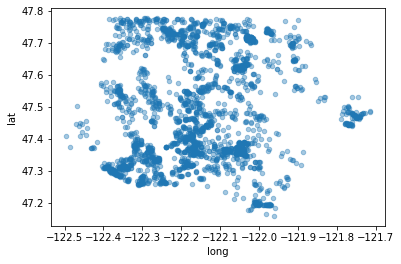

In [25]:
#Map of all of the datapoints
data.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show();

In [26]:
seattle_locations = Seattle_Homes[["lat", "long", "id"]]

In [27]:
notSeattle_locations = NotSeattle_Homes[["lat", "long", "id"]]

In [28]:
#import branca.colormap as cm
#from folium.plugins import StripePattern


In [29]:
#Create the non Seattle map
import folium
from folium.plugins import FastMarkerCluster
from branca.element import Template, MacroElement


map = folium.Map(location=[notSeattle_locations.lat.mean(), 
                           notSeattle_locations.long.mean()], zoom_start=9, control_scale=True)

for index, location_info in notSeattle_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='blue',icon='none')).add_to(map)

for index, location_info in seattle_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='orange',icon='none')).add_to(map)
  
king_county = [
    [47.777799, -121.998473],
    [47.777799, -122.419374],
    [47.734022, -122.419374],
    [47.503347, -122.419374],
    [47.503347, -122.419374],
    [47.503347, -122.533756],
    [47.324233, -122.533756],
    [47.324233, -122.419374],
    [47.257529, -122.419374],
    [47.257529, -122.249917],
    [47.161605, -121.924595],
    [47.161605, -121.404507],
    [47.373455, -121.404507],
    [47.600453, -121.131500],
    [47.777799, -121.131500],
    [47.777799, -121.998473],
]

# Plot lines using coordinates
my_PolyLine=folium.PolyLine(locations=king_county,weight=3, color = 'black')
map.add_child(my_PolyLine)

from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:4px; padding: 4px; font-size:14px; right: 15px; bottom: 10px;'>

<div class='legend-title'>Legend</div>

<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:orange;opacity:1.0;'></span>In Seattle</li>
    <li><span style='background:cadetblue;opacity:1.0;'></span>Out of Seattle</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 2px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 14px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map.get_root().add_child(macro)

map